In [6]:
import sys
import os

# Add the parent directory to the system path
sys.path.append(os.path.abspath("../utils"))

from transformdata import X_train , X_test , y_train , y_test

print(X_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 115782 stored elements and shape (5282, 8514)>
  Coords	Values
  (0, 8232)	0.25040301540124993
  (0, 4942)	0.3020279644797659
  (0, 8490)	0.35033272125468834
  (0, 4441)	0.3234652478407264
  (0, 8488)	0.36312218487299586
  (0, 4105)	0.38340866342101343
  (0, 131)	0.33611694335583137
  (0, 2844)	0.2517338974471896
  (0, 1880)	0.40436391696063495
  (1, 7601)	0.2784559751372677
  (1, 7729)	0.09738084451627431
  (1, 5232)	0.09808615400744047
  (1, 4703)	0.1430758576048859
  (1, 749)	0.12250483887130896
  (1, 3058)	0.23850803657884237
  (1, 295)	0.13710348759118834
  (1, 3780)	0.19010422491120965
  (1, 5160)	0.14617333031576848
  (1, 4827)	0.13934484340556888
  (1, 8103)	0.13230030210340882
  (1, 6646)	0.2278493798821864
  (1, 4739)	0.18793978521385618
  (1, 4879)	0.1632334529054089
  (1, 4875)	0.15457500539157024
  (1, 1764)	0.31126502871675993
  :	:
  (5280, 3547)	0.2253921362512485
  (5280, 999)	0.31897367003444643
  (5280, 13

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time
from xgboost import XGBClassifier

# Notes
## Interpreting Results of these tuners
The tuners both output data in dictionary format with two items:
- n_estimators
- accuracy

The number of estimators will be equal to the model number + 1

In [3]:
def rfTuner(X_train, y_train, X_test, y_test, epochs=100):
    print('Initializing Tuner...')
    output = {} # saving info on models
    best_acc = 0 # tracking highest accuracy
    start = time.time() # timing
    for i in range(epochs): # user-defined loop length
        model = RandomForestClassifier(n_estimators=i+1) # changing estimators
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        acc = accuracy_score(y_test, preds)
        output[i] = {'estimators':i+1, # output appending
                     'acc':acc}
        print(f'model complete: {i}', end='\r')
        if acc > best_acc: # updating highest accuracy
            print(f'New best Accuracy! Model {i}')
            print(f'{round(acc*100,2)}%')
            best_acc = acc
    print(f'Total runtime: {(time.time() - start)/60} minutes')
    return output


In [11]:
saved = rfTuner(X_train, y_train, X_test, y_test, epochs=200)

Initializing Tuner...
New best Accuracy! Model 0
82.06%
New best Accuracy! Model 2
82.91%
New best Accuracy! Model 3
84.61%
New best Accuracy! Model 4
85.29%
New best Accuracy! Model 5
85.35%
New best Accuracy! Model 6
86.09%
New best Accuracy! Model 10
86.6%
New best Accuracy! Model 14
87.28%
New best Accuracy! Model 19
87.45%
New best Accuracy! Model 23
88.3%
New best Accuracy! Model 42
88.36%
New best Accuracy! Model 55
88.42%
New best Accuracy! Model 66
88.59%
New best Accuracy! Model 85
88.98%
New best Accuracy! Model 131
89.15%
Total runtime: 21.712674729029338 minutes


In [4]:
def xgbTuner(X_train, y_train, X_test, y_test, epochs=100):
    output = {} # this one is basically the same as the other 
    best_acc = 0
    start = time.time()
    for i in range(epochs):
        model = XGBClassifier(objective='multi:softmax', num_class=5, n_estimators=i+1, learning_rate=0.1)
        ytrain_mod = [item-1 for item in y_train] # 1-5 in data, xgb likes starting from 0
        ytest_mod = [item-1 for item in y_test] # these lines just make a new list thats the same as before but -1
        model.fit(X_train, ytrain_mod)
        preds = model.predict(X_test)
        acc = accuracy_score(ytest_mod, preds)
        output[i] = {'estimators':i+1,
                     'acc':acc}
        print(f'model complete: {i}', end='\r')
        if acc > best_acc:
            print(f'New best Accuracy! Model {i}')
            print(f'{round(acc*100,2)}%')
            best_acc = acc
    print(f'Total runtime: {(time.time() - start)/60} minutes')
    return output
        

In [13]:
saved2 = xgbTuner(X_train, y_train, X_test, y_test, epochs=200)

New best Accuracy! Model 0
75.13%
New best Accuracy! Model 1
77.63%
New best Accuracy! Model 2
78.59%
New best Accuracy! Model 3
79.27%
New best Accuracy! Model 4
79.39%
New best Accuracy! Model 5
79.44%
New best Accuracy! Model 6
79.61%
New best Accuracy! Model 7
80.52%
New best Accuracy! Model 8
80.98%
New best Accuracy! Model 9
81.32%
New best Accuracy! Model 10
81.43%
New best Accuracy! Model 11
81.71%
New best Accuracy! Model 12
82.06%
New best Accuracy! Model 13
82.4%
New best Accuracy! Model 15
82.51%
New best Accuracy! Model 16
82.74%
New best Accuracy! Model 17
82.79%
New best Accuracy! Model 18
83.65%
New best Accuracy! Model 24
83.82%
New best Accuracy! Model 25
83.93%
New best Accuracy! Model 26
83.99%
New best Accuracy! Model 27
84.04%
New best Accuracy! Model 28
84.1%
New best Accuracy! Model 29
84.33%
New best Accuracy! Model 31
84.5%
New best Accuracy! Model 33
84.61%
New best Accuracy! Model 35
85.01%
New best Accuracy! Model 37
85.29%
New best Accuracy! Model 39
85.52

In [15]:
# Random Forest
i= 0
estimator1 = []
acc1 = []
acc_last = 0
peak1 = 0
for key in saved.keys():
    estimator1.append(saved[key]['estimators'])
    acc1.append(saved[key]['acc'])
for acc in acc1:
    if acc > acc_last:
        peak1 = i
    acc_last = acc
    i += 1
# XGBoost
i = 0
acc2_last = 0
estimator2 = []
acc2 = []
peak2 = 0
for key in saved2.keys():
    estimator2.append(saved2[key]['estimators'])
    acc2.append(saved2[key]['acc'])
for acc in acc2:
    if acc > acc2_last:
        peak2 = i
    acc_last2 = acc
    i += 1
print('Highest Scoring Models:')
print(f'Random Forest: {estimator1[peak1]} estimators, {round(acc1[peak1],2)}% accuracy ')
print(f'XGBoost: {estimator2[peak2]} estimators, {round(acc2[peak2],2)}% accuracy')

Highest Scoring Models:
Random Forest: 199 estimators, 0.89% accuracy 
XGBoost: 200 estimators, 0.88% accuracy


# Saving with `Pickle`

In [5]:
import pickle

In [6]:
def rfPacker(n_estimators, file):
    model = RandomForestClassifier(n_estimators=n_estimators)
    model.fit(X_train, y_train)
    with open(file, 'wb') as file:
        pickle.dump(model, file)

def xgbPacker(n_estimators, file):
    model = XGBClassifier(objective='multi:softmax', num_class=5, n_estimators=n_estimators, learning_rate=0.1)
    ytrain_mod = [item-1 for item in y_train]
    model.fit(X_train, ytrain_mod)
    with open(file, 'wb') as file:
        pickle.dump(model, file)

In [7]:
rfPacker(199, 'trained_mlmodels/rfHealthBot.pkl')
xgbPacker(200, 'trained_mlmodels/xgbHealthBot.pkl')

# Loading with `Pickle`

In [19]:
loaded_rf = pickle.load(open('trained_mlmodels/rfHealthBot.pkl', 'rb'))
loaded_xgb = pickle.load(open('trained_mlmodels/xgbHealthBot.pkl', 'rb'))
result1 = loaded_rf.predict(X_test)
result2 = loaded_xgb.predict(X_test)
print("Saved Model Scores:")
print(f'RandomForest: {accuracy_score(y_test, result1)}')
ytest_mod = [item-1 for item in y_test] # XGBoost likes 0-4 instead of 1-5
print(f'XGBoost: {accuracy_score(ytest_mod, result2)}')

Saved Model Scores:
RandomForest: 0.8847245883021011
XGBoost: 0.8841567291311755


In [13]:
def rfTuner2(X_train, y_train, X_test, y_test, epochs=100):
    print('Initializing Tuner...')
    accout = [0 for k in range(epochs)]
    estout = [0 for k in range(epochs)]
    best_acc = 0 # tracking highest accuracy
    start = time.time() # timing
    for i in range(epochs): # user-defined loop length
        if i < 100:
            pass
        else:
            model = RandomForestClassifier(n_estimators=i+1) # changing estimators
            model.fit(X_train, y_train)
            preds = model.predict(X_test)
            acc = accuracy_score(y_test, preds)
            accout[i] = acc
            estout[i] = i+1
            print(f'model complete: {i}', end='\r')
            if acc > best_acc: # updating highest accuracy
                print(f'New best Accuracy! Model {i}')
                print(f'{round(acc*100,2)}%')
                best_acc = acc
    print(f'Total runtime: {(time.time() - start)/60} minutes')
    return accout, estout


In [14]:
accout, estout = rfTuner2(X_train, y_train, X_test, y_test, epochs=300)

Initializing Tuner...
New best Accuracy! Model 100
88.19%
New best Accuracy! Model 103
88.3%
New best Accuracy! Model 106
88.53%
New best Accuracy! Model 114
88.59%
New best Accuracy! Model 117
88.81%
New best Accuracy! Model 118
88.93%
New best Accuracy! Model 164
89.15%
New best Accuracy! Model 280
89.44%
Total runtime: 17.525700418154397 minutes


In [18]:
import matplotlib.pyplot as plt

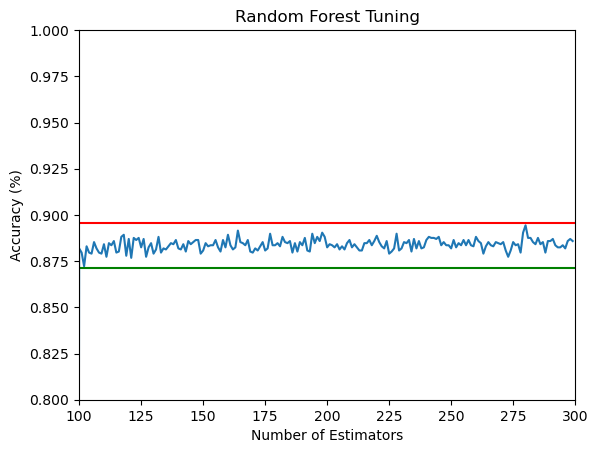

In [41]:
plt.plot(
    accout
)
plt.axis([100,300,0.8,1])
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy (%)')
plt.title('Random Forest Tuning')
plt.axhline(max(accout)+0.001, c='r')
plt.axhline(min(accout[100:])-0.001, c='g')
plt.show()